In [2]:
system("source activate sf_test")

ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


In [1]:
library(ggplot2)

In [2]:
vrs <- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/vrs_for_R.csv", sep ='\t', h=T)
per0<- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/permutations/roadmap_vrs_0-24_permutation_results.csv", sep = '\t', h=T)
per25<- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/permutations/roadmap_vrs_25-49_permutation_results.csv", sep = '\t', h=T)
per50<- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/permutations/roadmap_vrs_50-74_permutation_results.csv", sep = '\t', h=T)
per75<- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/permutations/roadmap_vrs_75-90_permutation_results.csv", sep = '\t', h=T)
per90<- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/permutations/2018-03-01_10k_random_results.csv", sep = '\t', h=F)

In [11]:
colnames(per90) = c("random_itr","min", "X25th","X50th", "X75th", "max", "median", "mean")
colnames(per50) = c("random_itr","min", "X25th","X50th", "X75th", "max", "median", "mean")

In [12]:
head(per90)

random_itr,min,X25th,X50th,X75th,max,median,mean
0,1,2,3,4,5,6,7.000000
random-1,0,1,5,13,71,5,9.343052
random-2,0,1,5,12,68,5,8.735990
random-3,0,1,4,12,78,4,8.576936
random-4,0,1,5,13,76,5,9.193392
random-5,0,1,5,12,73,5,8.917396


In [6]:
vrs_90 <- subset(vrs, percentile>=0.9)
vrs_75 <- subset(vrs, percentile<0.9& percentile>=0.75)
vrs_50 <- subset(vrs, percentile<0.75& percentile>=0.50)
vrs_25 <- subset(vrs, percentile<0.5& percentile>=0.25)
vrs_0 <- subset(vrs,  percentile<0.25)

In [8]:
head(vrs)

v.chr,v.start,v.end,IDs,sum,X90_percentile,act_sp,aln_sp,hq_act_sp,hq_aln_sp,aln_inact,hq_aln_inact,length,percentile
chr20,270226,272388,hsaH3K27Ac23366,0,0,2,9,1,7,7,6,2162,0.02
chr10,126076962,126079574,hsaH3K27Ac5900,0,0,0,0,0,0,0,0,2612,0.02
chr10,123358043,123358739,hsaH3K27Ac5855,0,0,5,12,2,5,7,3,696,0.02
chr19,7981384,7983285,hsaH3K27Ac18766,0,0,2,9,2,6,7,4,1901,0.02
chr2,200319976,200321620,hsaH3K27Ac22657,0,0,3,15,2,8,12,6,1644,0.02
chr2,200932286,200934456,hsaH3K27Ac22666,0,0,3,7,2,6,4,4,2170,0.02


In [19]:
ggplot(vrs, aes(x =percentile, y =sum, group = percentile)) +
  geom_boxplot()+ geom_boxplot(data=per90, mean)
    #scale_x_continuous(breaks=seq(0,10,1))+
    #ggtitle("hVillar Enhancers Active Overlap in Other Species x Enhancer Length\nFish - Conserved Enhancer Sequences Only")

ERROR: Error: Mapping must be created by `aes()` or `aes_()`


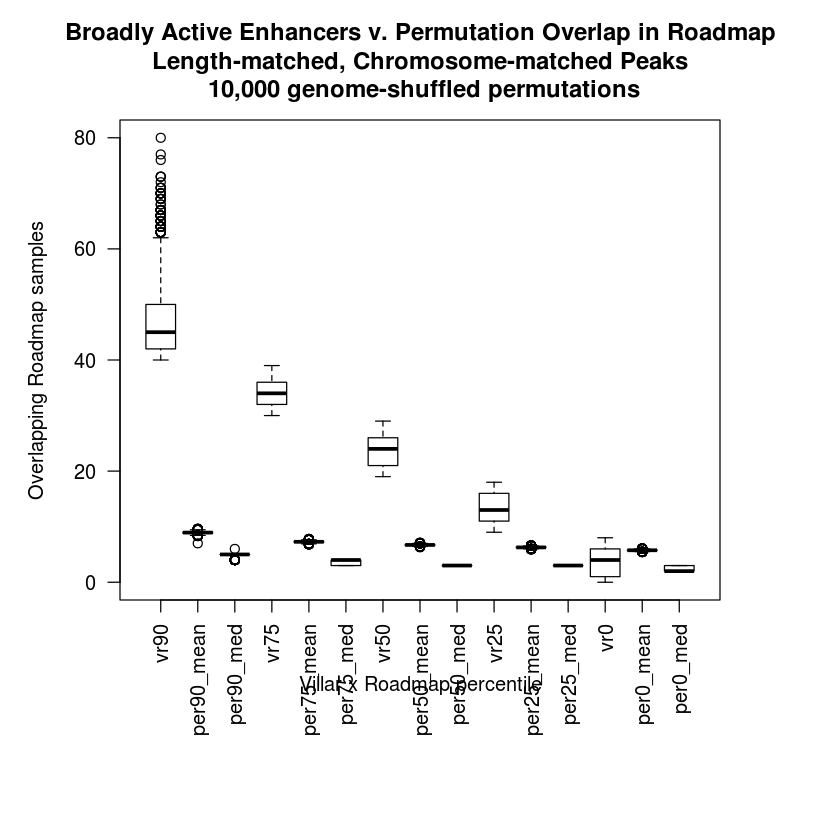

In [8]:
par(mar=c(10, 5, 5, 5))
boxplot(vrs_90$sum, per90$mean, per90$median, vrs_75$sum, per75$mean, per75$median, vrs_50$sum, per50$mean, per50$median, vrs_25$sum, per25$mean, per25$median,vrs_0$sum, per0$mean, per0$median,
        las =2 , 
        names = c("vr90","per90_mean", "per90_med", "vr75","per75_mean", "per75_med", "vr50", "per50_mean", "per50_med","vr25","per25_mean", "per25_med", "vr0", "per0_mean", "per0_med"),
        xlab = "Villar x Roadmap percentile",
        ylab = "Overlapping Roadmap samples",
        main ="Broadly Active Enhancers v. Permutation Overlap in Roadmap\nLength-matched, Chromosome-matched Peaks\n 10,000 genome-shuffled permutations")